# Fashion MNIST

The goal of this tutorial is to get demo how to get over 90% accuracy on Fashion MNIST with this framework.  While this isn't a partcularly hard thing to do, I think it's helpful to have an end-to-end example.

In [ ]:
from isaacai.all import *
import torch
from datasets import load_dataset
from torch import nn
from torcheval.metrics import MulticlassAccuracy
import torchvision.transforms.functional as TF

In [ ]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
torch.manual_seed(1)
set_seed(42)

In [ ]:
xmean,xstd = 0.28, 0.35
@inplace
def transformi(b): b['image'] = [(TF.to_tensor(o)-xmean)/xstd for o in b['image']]

_dataset = load_dataset('fashion_mnist').with_transform(transformi)
dls = DataLoaders.from_dataset_dict(_dataset, 256, num_workers=4)

Found cached dataset fashion_mnist (/home/.cache/huggingface/datasets/fashion_mnist/fashion_mnist/1.0.0/8d6c32399aa01613d96e2cbc9b13638f359ef62bb33612b077b4c247f6ef99c1)


  0%|          | 0/2 [00:00<?, ?it/s]

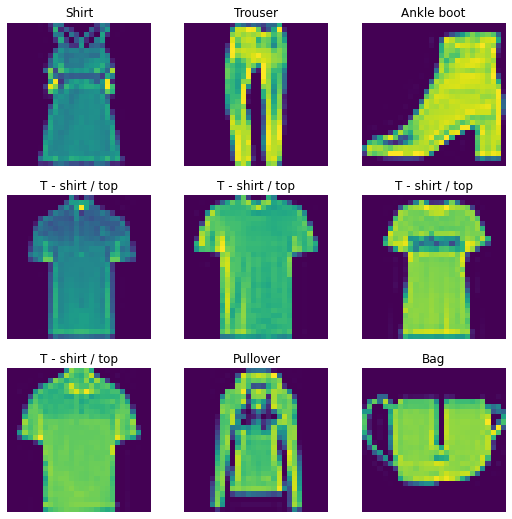

In [ ]:
dls.show_batch()

## Basic Trainer

In [ ]:
set_seed(1,True)
trainer = Trainer(dls,
              nn.CrossEntropyLoss(), 
              torch.optim.Adam, 
              get_model_conv(norm=nn.BatchNorm2d),
              callbacks=[CoreCBs(Accuracy=MulticlassAccuracy()),OneCycleSchedulerCB()])
trainer.fit(5,lr=.01)

,train,valid,Accuracy
0,0.695879,0.400296,0.8543


,train,valid,Accuracy
1,0.337101,0.411149,0.849500


,train,valid,Accuracy
2,0.272730,0.298542,0.889600


,train,valid,Accuracy
3,0.221198,0.263169,0.904600


,train,valid,Accuracy
4,0.180477,0.252623,0.906800


## Looking at Trainer

In [ ]:
trainer.summarize_callbacks()

## Looking at Model

In [ ]:
trainer.summarize_model()